In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True # Turns grid lines on globally
%matplotlib inline

In [70]:
data = pd.read_excel('Lab 11.xlsx',header = 0)
data = data.drop({'Part','S/N','Model','Make'}, axis = 1)
names = data.columns

In [71]:
data.columns = ['nomHeight','leftMan','rightMan','supV','outV','height']
for SV,OV,i in zip(data.loc[::,'supV'],data.loc[::,'outV'],range(len(data))):
    data.loc[i,'ratio'] = OV/SV*5.  

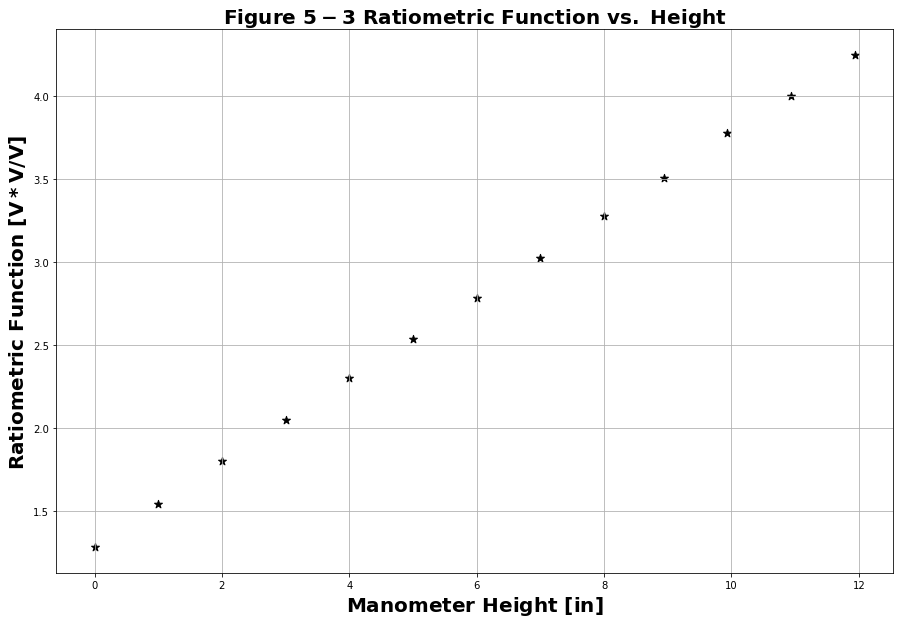

In [100]:
fig1,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.height,data.ratio,color = 'black',marker ='*',s = 70)
ax.set_ylabel(r'$\bf Ratiometric \ Function \ [V*V/V]$',fontsize = 20)
ax.set_xlabel(r'$\bf Manometer \ Height \ [in]$',fontsize=20)
ax.set_title(r'$\bf Figure \ 5-3 \ Ratiometric \ Function \ vs. \ Height$',fontsize = 20)
plt.show()

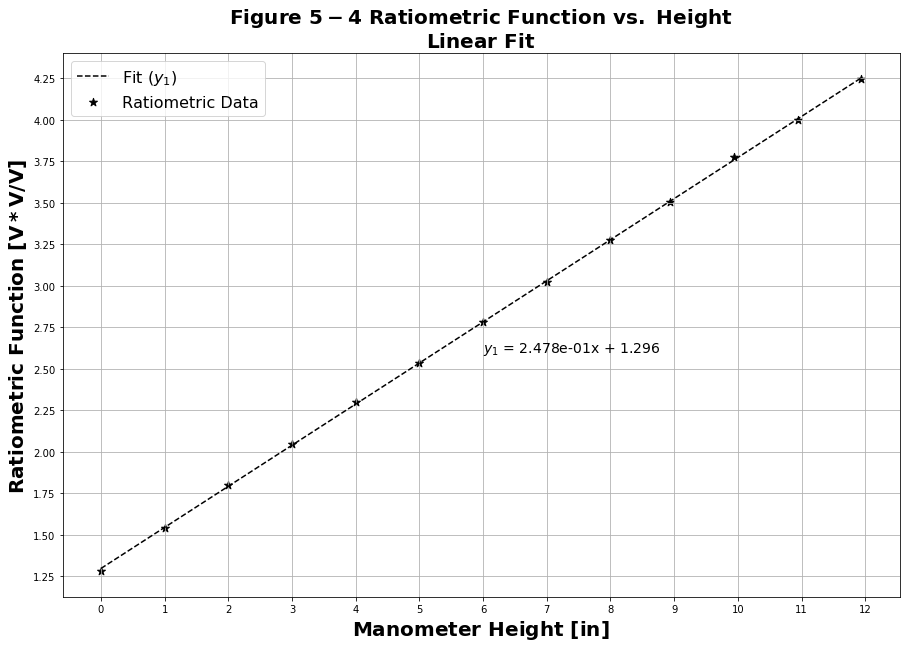

In [98]:
fig2,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.height,data.ratio,color = 'black',marker ='*',s = 70)
ax.set_ylabel(r'$\bf Ratiometric \ Function \ [V*V/V]$',fontsize = 20)
ax.set_xlabel(r'$\bf Manometer \ Height \ [in]$',fontsize=20)
ax.set_xticks(np.linspace(0,12,13))
ax.set_yticks(np.arange(1,4.5,.25))
ax.set_title(r'$\bf Figure \ 5-4 \ Ratiometric \ Function \ vs. \ Height$'+' \n' + r'$\bf Linear \ Fit$',fontsize = 20)
p1 = np.polyfit(data.height,data.ratio,1)
fit1 = np.polyval(p1,data.height)
ax.plot(data.height,fit1,linestyle = '--',color = 'black')
ax.legend(['Fit ($y_{1}$)','Ratiometric Data'],loc = 'upper left',prop={'size': 16})
txt1 = '$y_{1}$ = %.3ex'%p1[0]+' + %.3f'%p1[1]
ax.text(6,2.6,txt1,fontsize = 14)
plt.show()

In [74]:
p1

array([0.24775502, 1.29567132])

In [67]:
data

,nomHeight,leftMan,rightMan,supV,outV,height,ratio
0,0,7.3125,7.3125,5.015,1.284,0.0000,1.280160
1,1,6.8125,7.8125,5.015,1.546,1.0000,1.541376
2,2,6.3125,8.3125,5.015,1.803,2.0000,1.797607
3,3,5.8125,8.8125,5.015,2.053,3.0000,2.046859
4,4,5.3125,9.3125,5.015,2.305,4.0000,2.298106
5,5,4.8125,9.8125,5.015,2.545,5.0000,2.537388
6,6,4.3125,10.3125,5.015,2.787,6.0000,2.778664
7,7,3.8125,10.8125,5.015,3.034,7.0000,3.024925
8,8,3.3125,11.3125,5.015,3.287,8.0000,3.277168
9,9,2.8750,11.8125,5.015,3.513,8.9375,3.502493
